<a href="https://colab.research.google.com/github/kingshuk-1729/Computer-vision/blob/master/LOG_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishiraj Nath 
ELB

# Laplacian of Gaussian (LoG) filter

STEPS: 

1. Smoothening of an image by **Gaussian Filter**
2. Enhance The Edge Using **Laplacian Operator**
3. **Zero crossing** denotes the edge location

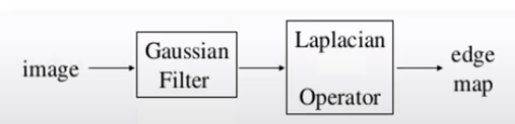

In [ ]:
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import io

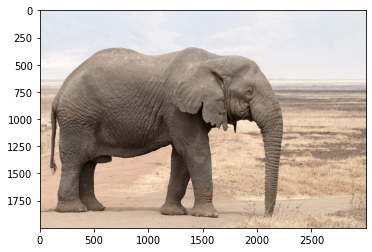

In [ ]:
image = io.imread('/content/drive/My Drive/Computer Vision/LOG and DOG/af_ele.jpg')
plt.imshow(image)

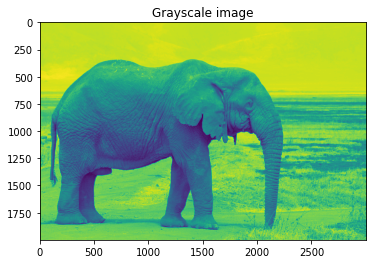

In [ ]:
from skimage.color import rgb2gray
grayscale = rgb2gray(image)
plt.title('Grayscale image')
plt.imshow(grayscale)

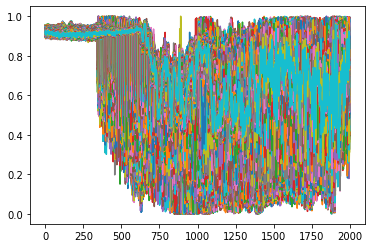

In [ ]:
plt.plot(grayscale) 
plt.show()

In [ ]:
# smoothing using gaussian filter because laplacian filter is sensitive to noise
from skimage.filters import gaussian
img = gaussian(grayscale, 15)

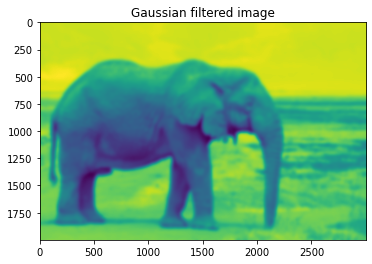

In [ ]:
plt.title('Gaussian filtered image')
plt.imshow(img)

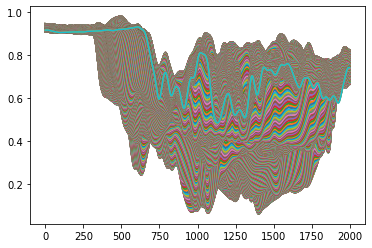

In [ ]:
plt.plot(img) 
plt.show()

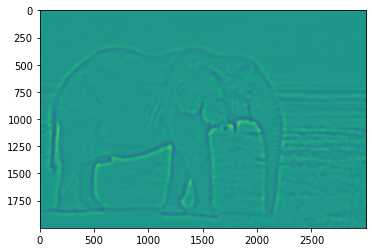

In [ ]:
# Applying laplacian filter
from skimage.filters import laplace
LOG = laplace(img, ksize=3, mask=None)
plt.imshow(LOG)

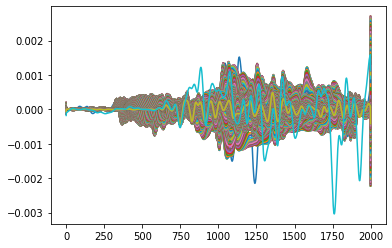

In [ ]:
plt.plot(LOG) 
plt.show()

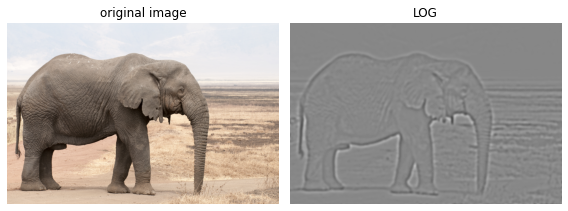

In [ ]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('original image')

axes[1].imshow(LOG, cmap=plt.cm.gray)
axes[1].set_title('LOG')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Once the image has been LoG filtered, it only remains to detect the zero crossings. This can be done in several ways.The simplest is to simply threshold the LoG output at zero, to produce a binary image where the boundaries between foreground and background regions represent the locations of zero crossing points. 

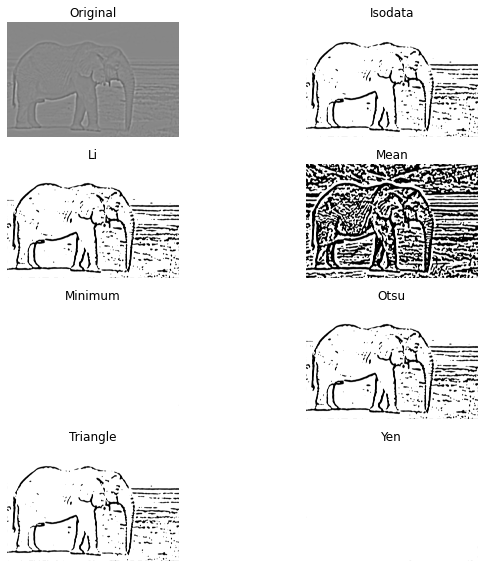

In [ ]:
from skimage.filters import try_all_threshold
# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
LOG1 = LOG
LOG2 = LOG
fig, ax = try_all_threshold(LOG, figsize=(10, 8), verbose=False)
plt.show()

From the above thresolding method we try to find the best fit thresolding method to obtain the edges

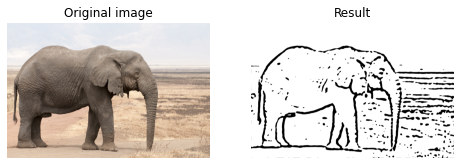

In [ ]:
from skimage.filters import threshold_otsu


thresh = threshold_otsu(LOG1)
binary = LOG1 > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

# Approximation of LOG filter using DOG filter

It is possible to approximate the LoG filter with a filter that is just the difference of two differently sized Gaussians. Such a filter is known as a DoG filter (short for `Difference of Gaussians').

The input array is blurred with two Gaussian kernels of differing sigmas to produce two intermediate, filtered images. The more-blurred image is then subtracted from the less-blurred image. The final output image will therefore have had high-frequency components attenuated by the smaller-sigma Gaussian, and low frequency components will have been removed due to their presence in the more-blurred intermediate.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import difference_of_gaussians, window
from scipy.fftpack import fftn, fftshift

In [ ]:
image1 = LOG
wimage = image1 * window('hann', image1.shape)  # window image to improve FFT
filtered_image = difference_of_gaussians(image1, 1, 12)
filtered_wimage = filtered_image * window('hann', image1.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))


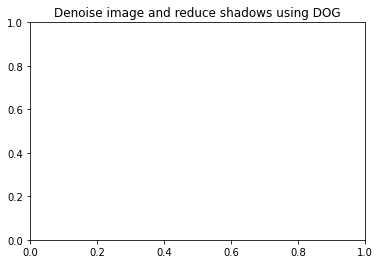

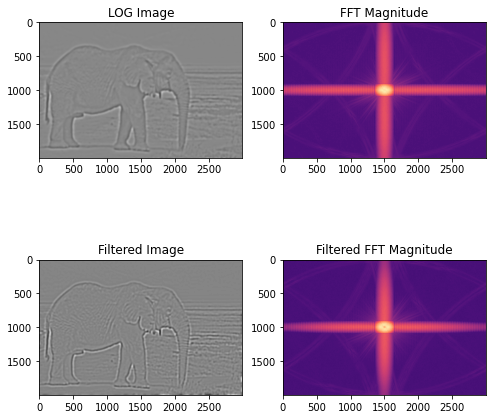

In [ ]:
plt.title('Denoise image and reduce shadows using DOG')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image1, cmap='gray')
ax[0, 0].set_title('LOG Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('FFT Magnitude')
ax[1, 0].imshow(filtered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude')
plt.show()

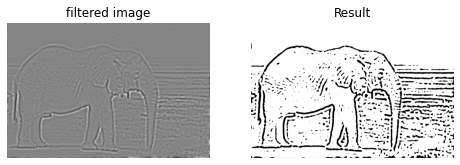

In [ ]:
from skimage.filters import threshold_otsu


thresh = threshold_otsu(filtered_image)
binary1 = filtered_image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(filtered_image, cmap=plt.cm.gray)
ax[0].set_title('filtered image')

ax[1].imshow(binary1, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

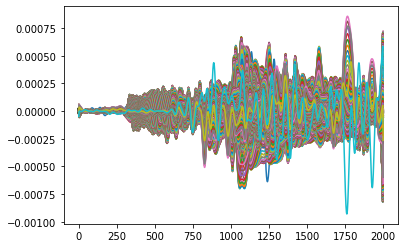

In [ ]:
plt.plot(filtered_image) 
plt.show()

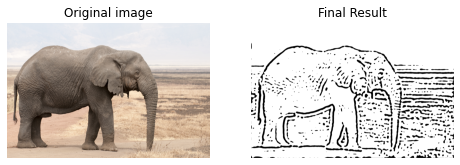

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary1, cmap=plt.cm.gray)
ax[1].set_title('Final Result')

for a in ax:
    a.axis('off')

plt.show()

# Blob detection using LoG and DoG

Here skimage function for LOG and DoG is used to detect the blob

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


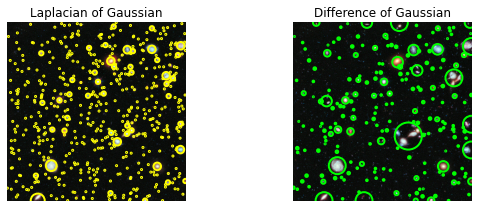

In [ ]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_list = [blobs_log, blobs_dog,]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

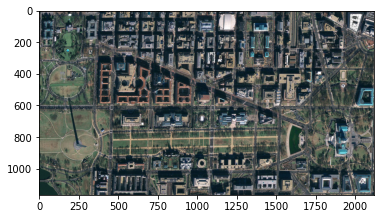

In [ ]:
imagep = io.imread('/content/drive/My Drive/Computer Vision/LOG and DOG/sat2.jpg')
plt.imshow(imagep)

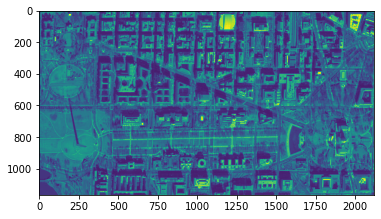

In [ ]:
image_gray2 = rgb2gray(imagep)
plt.imshow(image_gray2)

In [ ]:
from skimage import exposure
img = exposure.equalize_hist(image_gray2)  # improves detection

In [ ]:
img

array([[0.37610083, 0.42075748, 0.45295992, ..., 0.84752298, 0.84396154,
        0.89224153],
       [0.35739937, 0.3756513 , 0.3946032 , ..., 0.89296175, 0.83055454,
        0.86151869],
       [0.3946032 , 0.38191947, 0.38191947, ..., 0.92237859, 0.88732629,
        0.85305204],
       ...,
       [0.25877189, 0.26641019, 0.26641019, ..., 0.19481933, 0.17425633,
        0.13852561],
       [0.25877189, 0.25877189, 0.26641019, ..., 0.19481933, 0.19481933,
        0.19481933],
       [0.25877189, 0.25877189, 0.26641019, ..., 0.26948166, 0.28339424,
        0.29660388]])

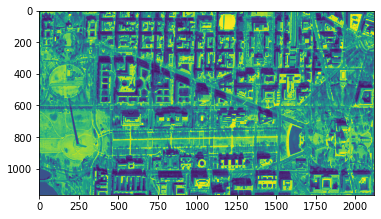

In [ ]:
plt.imshow(img)

In [ ]:
imglog =  feature.blob_log(img, threshold = 0.3)

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


In [ ]:
imglog

array([[1.16600000e+03, 1.13700000e+03, 6.44444444e+00],
       [1.16600000e+03, 1.06500000e+03, 1.00000000e+00],
       [1.16600000e+03, 8.83000000e+02, 1.18888889e+01],
       ...,
       [0.00000000e+00, 1.03900000e+03, 1.73333333e+01],
       [0.00000000e+00, 7.78000000e+02, 1.00000000e+00],
       [0.00000000e+00, 3.45000000e+02, 2.27777778e+01]])

the above are the blobs

In [ ]:
imgdog =  feature.blob_dog(img, threshold = .3)

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma 

In [ ]:
imgdog

array([[1166.        , 2065.        ,   26.8435456 ],
       [1166.        , 1993.        ,   42.94967296],
       [1166.        , 1908.        ,    2.56      ],
       ...,
       [   0.        ,  190.        ,    4.096     ],
       [   0.        ,   89.        ,   26.8435456 ],
       [   0.        ,    0.        ,   26.8435456 ]])

In [ ]:
# Compute radii in the 3rd column.
imglog[:, 2] = imglog[:, 2] * sqrt(2)
imgdog[:, 2] = imgdog[:, 2] * sqrt(2)


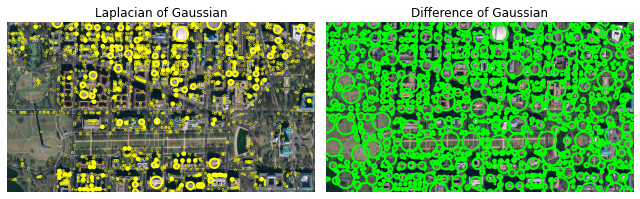

In [ ]:
blobs_list = [imglog, imgdog,]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(imagep)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()